# 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university. I,e we have a classifcation problem. features are results on two different exams.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import numpy as np
from scipy import optimize
df=pd.read_csv('ex2data1.txt')

#### 1.1 Visualizing the data

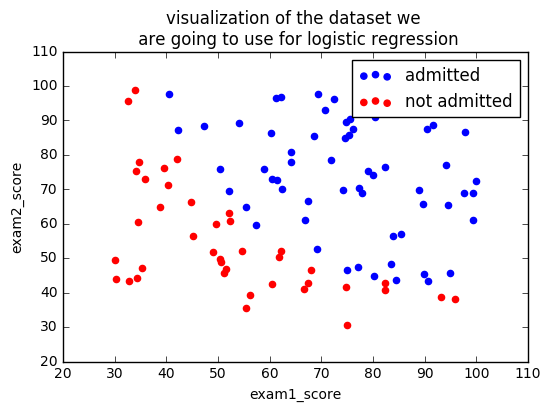

In [14]:
not_admitted_df=df[df.y==0]
admitted_df=df[df.y==1]
column_names=df.columns.tolist()
plt.scatter(admitted_df[column_names[0]], admitted_df[column_names[1]], label="admitted", color="blue")
plt.scatter(not_admitted_df[column_names[0]], not_admitted_df[column_names[1]], label="not admitted", color="red")
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('visualization of the dataset we \n are going to use for logistic regression')
plt.legend()
plt.show()

In [15]:
from scipy.special import expit as sigmoid
    #bonus: vectorized
#sigmoid=np.vectorize(sigmoid_R)

###there is a little problem with above, it does not have asymptotic behavior! this becomes a problem if one tries to 
# do gradient descent using the sigmoid function as the model that defines the hypothesis set

In [61]:
#same has previous assignment
def df_to_matrix(df,Y_name='y', theta_array=None):
    column_names=df.columns.tolist()
    column_names.remove(Y_name)
    X_df=df[column_names]
    X_df['intercept']=1
    X_column_names=['intercept']+ column_names
    X=X_df[X_column_names].as_matrix()

    Y=df[Y_name].as_matrix()

    if theta_array==None:
        theta_array=[]
        for i in range(0,len(X_column_names)):
            theta_array.append(0)

    #the operations on X will become messeed up if i do not use float here. the question remains of wheather i should do the conversion somewhere else.
    X=X.astype(float)
    Y=Y.astype(float)
    theta_array=np.array(theta_array).astype(float)
    return X, Y, theta_array
    
X,Y,theta_array=df_to_matrix(df,'y')

#### 1.2.2 implement the cost function and gradient for logistic regression.

The costfunction and gradient function are almost similar to before. in this assigment the hypothesisfunction is the sigmoid function. on the previous assignment it was linear (which i solved by using the inner dot product when appropriate).
An improvement and abstraction would be to let these functions have the hypothesisfunction as an argument, and use them for all class of suitable problems. I,e when the costfunction is represented by the sum of squared errors and that it is convex in all of its arguments.

In [17]:
#regularize by setting l=0 in the argument
#Note that you should not regularize the parameter theta_array[0]!! i,e use theta_array[1:]
def cost_function(theta_array,X,Y, l=0):
    cost_list=[]

    m=len(Y)
    for i in range(0,len(Y)):
        h_theta=sigmoid(np.dot(theta_array,X[i]))
        term=(-Y[i]*np.log(h_theta)-(1-Y[i])*np.log(1-h_theta))/m
        cost_list.append(term)


    cost=sum(cost_list)+(l/(2*m))*np.dot(theta_array[1:].T,theta_array[1:])

    return float(cost)

#second approach for computing the cost function. they both work. (though i did not extend cost_function2 to include l)

def cost_function2(theta_array, X,Y):
    m=len(Y)
    h_x=sigmoid(np.dot(X,theta_array.T))

    term1=np.dot(np.log(h_x),-Y.T)
    term2=np.dot(np.log(1-h_x),(1-Y).T)

    return (term1-term2)/m

In [62]:
def gradient_function(theta_array,X,Y, l=0):

    common_term_for_derivatives_list=[]
    m=len(Y)
    for i in range(0,len(Y)):
        h_theta=sigmoid(np.dot(theta_array,X[i]))

        #do some work on the gradient
        common_term_for_derivatives=(h_theta-Y[i])/m
        common_term_for_derivatives_list.append(common_term_for_derivatives)
        #

    #gradient
    gradient=[]
    #datastructure change so that we can use dot prodcut
    common_term_for_derivatives_array=np.array(common_term_for_derivatives_list)
    for j in range(0, len(theta_array)):
        #Note that you should not regularize the parameter theta_array[0]!! hence the if-else clausul below
        if j==0:
            derivative=np.dot(common_term_for_derivatives_array,X[:,j])
        else:
            derivative=np.dot(common_term_for_derivatives_array,X[:,j]) +(l/m)*theta_array[j]

        gradient.append(derivative)

    gradient=np.array(gradient)

    return gradient

In [63]:
cost=cost_function(theta_array,X,Y)
gradient=gradient_function(theta_array,X,Y)
gradient

array([ -0.1       , -12.00921659, -11.26284221])

In [64]:
cost

0.6931471805599461

"You should see that the cost is about 0.693."-pdf

#### 1.2.3 Learning parameters using fminunc

In [65]:
def optimal_thetas(theta_array,X,Y,iterations=400):
    result = optimize.fmin(cost_function, x0=theta_array, args=(X, Y), maxiter=iterations, full_output=True)
    return result[0], result[1]

In [66]:
theta_array_opti, minimal_cost=optimal_thetas(theta_array,X,Y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [67]:
theta_array_opti

array([-25.16130062,   0.20623142,   0.20147143])

 "You should see that the cost is about
0.203."-pdf

#### 1.2.4 Evaluating logistic regression

In [69]:
sigmoid(np.dot(theta_array_opti,np.array([1,45,85])))

0.77629159041124107

For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

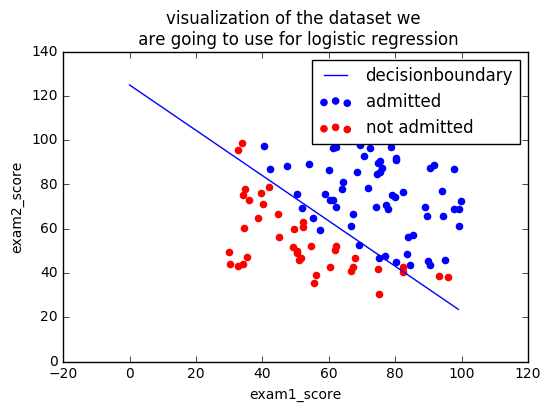

In [70]:
def DB_function_outer(theta_array_opti):

    def DB_function_inner(x):
        return (-theta_array_opti[0]-theta_array_opti[1]*x)/theta_array_opti[2]

    return DB_function_inner

DB_function_inner=DB_function_outer(theta_array_opti)
x_range=list(range(0,100))
y_range=list(map(DB_function_inner, x_range))

not_admitted_df=df[df.y==0]
admitted_df=df[df.y==1]
plt.plot(x_range,y_range, label="decisionboundary")
plt.scatter(admitted_df[column_names[0]], admitted_df[column_names[1]], label="admitted", color="blue")
plt.scatter(not_admitted_df[column_names[0]], not_admitted_df[column_names[1]], label="not admitted", color="red")
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('visualization of the dataset we \n are going to use for logistic regression')
plt.legend()
plt.show()

#### 2 Regularized logistic regression

n this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

add column_names on the datafile

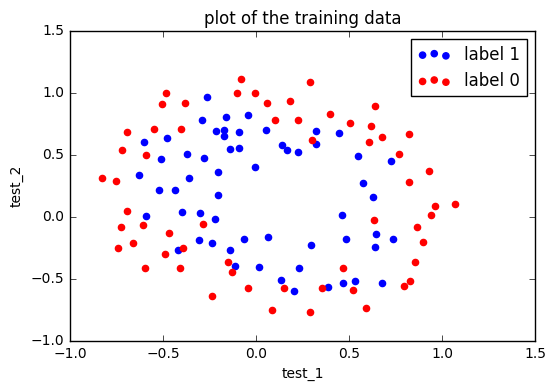

In [72]:
microchip_test_df=pd.read_csv('ex2data2.txt')

def classification_plot(df, title='plot of the training data'):
    column_names=df.columns.tolist()
    y_name=column_names[-1]

    X_sth_y0=df[df[y_name]==0]
    X_sth_y1=df[df[y_name]==1]

    plt.scatter(X_sth_y1[column_names[0]], X_sth_y1[column_names[1]], label="label 1", color="blue")
    plt.scatter(X_sth_y0[column_names[0]], X_sth_y0[column_names[1]], label="label 0", color="red")
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

classification_plot(microchip_test_df)


2.2 Feature mapping

In [90]:
X_df_copy=microchip_test_df.copy()
X_df_copy.columns=['x1','x2', 'y']
series1=X_df_copy['x1']
series2=X_df_copy['x2']

In [74]:
def mapfeature_binominal(series1,series2,n=6):

    #a bit hacky admitedly, but here i though about puting for when the code when series1 and series2 are arrays
    # consider the principle of SOLID, Open to change. perhaps i should have done this function more general. but on the other hand this was a challenging function to make:make it work, and then optimize it.

    if n==1:
        return
    else:
        for i in range(0,n+1):
            #name=str((n-i)) + " 1's * " + str(i)+ " 2's"
            name='x1**'+str((n-i)) +"*"+ "x2**"+str(i)
            formula=((series1)**(n-i))*((series2)**(i))

            X_df_copy[name]=formula

        mapfeature_binominal(series1,series2,n-1)

^^this works, but does not give the same order as those in the instructions.
note that im not returning anything in the case of series, but only modiyfing. took a long time to construct!

In [91]:
mapfeature_binominal(series1,series2)
X_reg, Y_reg, theta_array=df_to_matrix(X_df_copy)
cost_function(theta_array,X_reg,Y_reg)

0.6931471805599451

In [78]:
#You should see that the cost is about 0.693. (again)


In [92]:
theta_array_opti_reg, minimal_cost_reg=optimal_thetas(theta_array,X_reg,Y_reg,iterations=100000)

Optimization terminated successfully.
         Current function value: 0.383991
         Iterations: 17865
         Function evaluations: 21268


In [98]:
theta_array_opti_reg

array([  3.60728532,   0.48651444,   3.39313423,  -5.89004029,
        -5.41967127, -20.91988601,  16.52773228,  -4.52406175,
        16.60588311,  -4.98782047,  -7.22859564,   8.97390944,
       -13.51121532,  19.26115414,  19.70048973,  -4.73563146,
         8.23485288,  13.57470272,   3.32674198, -36.61333742,
         0.08384434,   6.68822799, -10.9122489 ,   4.28103204,
         6.15353086, -10.48586115,  -3.8897711 ,  -8.18067859])

In [100]:
minimal_cost_reg

0.38399121138393727

lool needad alot of iterations! lesson: regulators cost alot in terms of complexity.

in order to do the actual prediction i need to create a mapfeature_binominal function for the datapoint, so that it takes (x1,x2)-> array of their binominial combinations
#this is neccessary in order for sigmoid(np.dot(theta_array_opti_reg,[x1,x2])) to make sense.

In [86]:
def mapfeature_binominal_array(x1,x2,n=6,lst=None):

    #a bit hacky admitedely, but here i though about puting for when the code when series1 and series2 are arrays
    # consider the principle of SOLID, Open to change. perhaps i should have done this function more general. but on the other hand this was a challenging function to make:make it work, and then optimize it.
    if lst==None:
        #dont forget the x0=1
        lst=[]
        lst.append(1)
        lst.append(x1)
        lst.append(x2)

    if n==1:

        return np.array(lst)
    else:
        for i in range(0,n+1):
            formula=((x1)**(n-i))*((x2)**(i))
            lst.append(formula)


        return mapfeature_binominal_array(x1,x2,n-1,lst)

i leard alot when i asked about a problem i had regarding this on stackoverflow: http://stackoverflow.com/questions/39971512/returning-an-array-using-recursion-in-python-3/39971603#39971603

In [93]:
test_array=mapfeature_binominal_array(-0.25,1.5)

In [94]:
sigmoid(np.dot(theta_array_opti_reg.T,test_array))

2.2431627122025543e-47

In [ ]:
#i get some error for above prediction. check tommor

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])